In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
sns.set()

# 課題1
## 線形関数を使った識別を行い、パラメータの決定手法ごとの違いを見る

使用する手法は以下の3つ
- 最小二乗誤差
- ロジスティック回帰
- フィッシャーの判別分析

In [3]:
# class Classifier:
#     def __init__(self, models, train_X, train_y, test_X, test_y):
#         self.models = models
#         self.train_X = train_X
#         self.train_y = train_y
#         self.test_X = test_X
#         self.test_y = test_y
#         
#     def fit(self):
#         for name, model in self.models.items():
#             model.fit(self.train_X, self.train_y)
#         
#     def train_score(self):
#         for name, model in self.models.items():
#             score = model.score(self.train_X, self.train_y)
#             print(f'{name} train score: {score}')
# 
#     def test_score(self):
#         for name, model in self.models.items():
#             score = model.score(self.test_X, self.test_y)
#             print(f'{name} test score: {score}')
# 
#     def plot_decision_surface(self):
#         for name, model in self.models.items():
#             if len(model.coef_.shape) == 2:
#                 coef = model.coef_[0]
#             else:
#                 coef = model.coef_
#         
#             plt.scatter(self.train_X[:, 0], self.train_X[:, 1], s=15)
#             x1 = np.linspace(self.train_X[:, 0].min(), self.train_X[:, 0].max())
#             x2 = - (model.intercept_ + coef[0] * x1) / coef[1]
#             print(f'{name} params w0: {model.intercept_}, w1: {coef[0]}, w2: {coef[1]}')
#             plt.plot(x1, x2, label=name)
#             plt.ylim(train_X[:, 1].min() - 10, train_X[:, 1].max() + 10)
#             plt.legend()


In [26]:
def plot_decision_surface(models, data):
    for name, model in models.items():
        if len(model.coef_.shape) == 2:
            coef = model.coef_[0]
        else:
            coef = model.coef_

        plt.scatter(data[:, 0], data[:, 1], s=15)
        x1 = np.linspace(data[:, 0].min(), data[:, 0].max())
        x2 = - (model.intercept_ + coef[0] * x1) / coef[1]
        print(f'{name} params w0: {model.intercept_}, w1: {coef[0]}, w2: {coef[1]}')
        plt.plot(x1, x2, label=name)
        plt.ylim(data[:, 1].min() - 10, data[:, 1].max() + 10)
        plt.legend()

def score(model, predict):
    


In [4]:
def create_data(mean1, sigma1, mean2, sigma2, size, rate):
    sample1 = np.random.multivariate_normal(mean1, sigma1, int(size * rate))
    class1 = np.ones(sample1.shape[0])

    sample2 = np.random.multivariate_normal(mean2, sigma2, int(size * (1 - rate)))
    class2 = np.zeros(sample2.shape[0])

    X = np.vstack((sample1, sample2))
    y = np.hstack((class1, class2))
    return train_test_split(X, y, test_size=0.3)

In [5]:
# X, y = make_classification(n_samples=1000,
#                            n_features=2,
#                            n_redundant=0,
#                            n_informative=1,
#                            n_clusters_per_class=1,
#                            n_classes=2)

Least Squared Error params w0: -0.3215954337662617, w1: -0.03247557337069012, w2: 0.02388407163244415
Logistic Regression params w0: [-0.03804038], w1: -0.5886404930568845, w2: 0.20122198124932658
lda params w0: [-21.06852823], w1: -2.127548892372179, w2: 1.5647000152060588


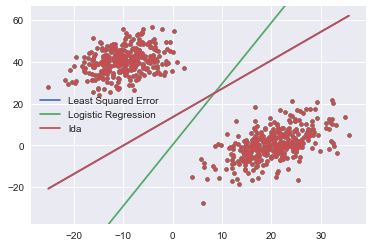

In [29]:
mean1 = np.array([-10, 40])
sigma1 = np.array([[20, 10], [10, 40]])
mean2 = np.array([20, 0])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)

logistic = LogisticRegression()
logistic.fit(train_X, train_y)

linear = LinearRegression()
linear.fit(train_X, np.where(train_y == 0, -1, train_y))

lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)

models = {'Least Squared Error': linear, 'Logistic Regression': logistic, 'lda': lda}
plot_decision_surface(models, train_X)

Least Squared Error params w0: -0.9203054181971108, w1: -0.02680944374189378, w2: 0.04652425215232509
Logistic Regression params w0: [-5.04951557], w1: -0.1813996582483172, w2: 0.2995410842443903
lda params w0: [-23.31648658], w1: -0.6792350892612906, w2: 1.1787228734670911


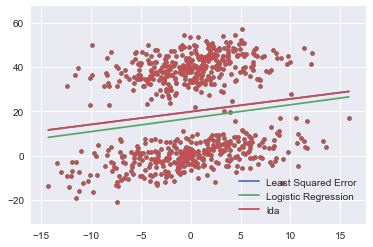

In [32]:
mean1 = np.array([0, 40])
sigma1 = np.array([[20, 10], [10, 40]])
mean2 = np.array([0, 0])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)

logistic = LogisticRegression()
logistic.fit(train_X, train_y)

linear = LinearRegression()
linear.fit(train_X, np.where(train_y == 0, -1, train_y))

lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)

models = {'Least Squared Error': linear, 'Logistic Regression': logistic, 'lda': lda}
plot_decision_surface(models, train_X)

Least Squared Error params w0: -0.5651125863041055, w1: 0.0356591895021326, w2: 0.01882134215276525
Logistic Regression params w0: [-2.44778203], w1: 0.673031233962189, w2: -0.04728109845090341
lda params w0: [-14.09081536], w1: 0.8891440152989378, w2: 0.46930073197608857


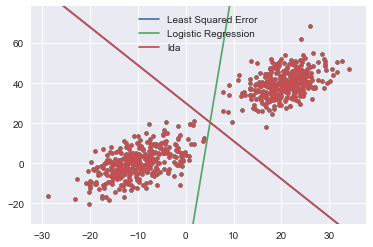

In [35]:
mean1 = np.array([20, 40])
sigma1 = np.array([[20, 10], [10, 40]])
mean2 = np.array([-10, 0])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)

logistic = LogisticRegression()
logistic.fit(train_X, train_y)

linear = LinearRegression()
linear.fit(train_X, np.where(train_y == 0, -1, train_y))

lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)

models = {'Least Squared Error': linear, 'Logistic Regression': logistic, 'lda': lda}
plot_decision_surface(models, train_X)

# 課題2
## パーセプトロンの学習過程をプロットする

In [112]:
class Perceptron:
    def __init__(self, w):
        self.w = w

    def predict(self, x):
        return x.dot(self.w) + 1
        # return x.dot(self.w)

    def __update_params(self, x, y):
        eta = 1
        return self.w + eta * x * y
    
    def plot_learning_process(self, data_X, data_y):
        y = np.where(data_y == 0, -1, data_y)
        x1 = np.linspace(data_X[:, 0].min(), data_X[:, 0].max())
        x2 = - (1 + self.w[0] * x1) / self.w[1]
        # x2 = - (self.w[0] + self.w[1] * x1) / self.w[2]

        plt.scatter(data_X[:, 0], data_X[:, 1], s=15)
        plt.plot(x1, x2, label='init')
        plt.ylim(data_X[:, 1].min() - 10, data_X[:, 1].max() + 10)

        # data_X = np.hstack((np.ones((len(data_X), 1)), data_X))

        param_update_count = 0
        for i in range(100):
            true_count = 0
            for j in range(len(data_X)):
                x = data_X[j, :]
                fx = self.predict(x)

                if fx * y[j] < 0:
                    self.w = self.__update_params(x, y[j])
                    x2 = - (1 + self.w[0] * x1) / self.w[1]
                    # x2 = - (self.w[0] + self.w[1] * x1) / self.w[2]
                    param_update_count += 1
                    plt.plot(x1, x2, label=f'step {param_update_count}')
                    plt.legend()
                    continue

                true_count += 1

            if true_count == len(data_X):
                print('finish learning')
                break
        
    def print_params(self):
        print(f'w1 = {self.w[0]}, w2 = {self.w[1]}')
        # print(f'w0 = {self.w[0]}, w1 = {self.w[1]}, w2 = {self.w[2]}')
    
    def score(self, data_X, data_y):
        # data_X = np.hstack((np.ones((len(data_X), 1)), data_X))
        predict = np.where(self.predict(data_X) < 0, -1, 1)
        y = np.where(data_y == 0, -1, data_y)
        correct = predict == y
        score = np.sum(correct) / len(y)
        print(f'score: {score}')


finish learning
w1 = -44.18416539209327, w2 = 21.44981125619937
score: 1.0


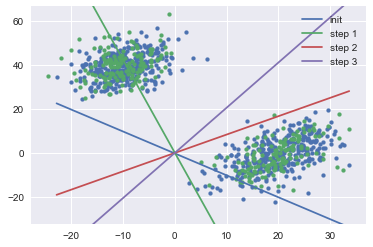

In [113]:
mean1 = np.array([-10, 40])
sigma1 = np.array([[20, 10], [10, 40]])
mean2 = np.array([20, 0])
sigma2 = np.array([[30, 20], [20, 50]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)

init_w = np.array([5, 5])

perceptron1 = Perceptron(init_w)
perceptron1.plot_learning_process(train_X, train_y)
perceptron1.print_params()
perceptron1.score(test_X, test_y)
plt.scatter(test_X[:, 0], test_X[:, 1], s=15)

finish learning
w1 = -1.9402860630518237, w2 = 9.142780925735492
score: 1.0


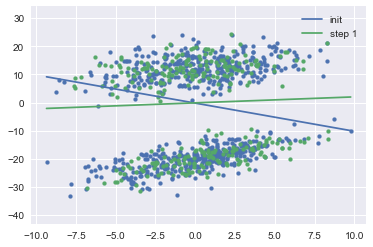

In [114]:
mean1 = np.array([0, 12])
sigma1 = np.array([[10, 5], [5, 20]])
mean2 = np.array([0, -20])
sigma2 = np.array([[10, 10], [10, 20]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)

init_w = np.array([5, 5])

perceptron2 = Perceptron(init_w)
perceptron2.plot_learning_process(train_X, train_y)
perceptron2.print_params()
perceptron2.score(test_X, test_y)
plt.scatter(test_X[:, 0], test_X[:, 1], s=15)

finish learning
w1 = 18.881173962972248, w2 = 1.254623576783139
score: 1.0


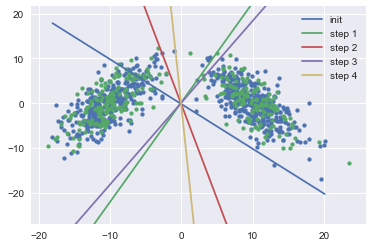

In [116]:
mean1 = np.array([10, 0])
sigma1 = np.array([[10, -10], [-10, 20]])
mean2 = np.array([-10, 0])
sigma2 = np.array([[10, 10], [10, 20]])
c1_rate = 0.5

train_X, test_X, train_y, test_y = create_data(mean1, sigma1, mean2, sigma2, 1000, c1_rate)
init_w = np.array([5, 5])

perceptron3 = Perceptron(init_w)
perceptron3.plot_learning_process(train_X, train_y)
perceptron3.print_params()
perceptron3.score(test_X, test_y)
plt.scatter(test_X[:, 0], test_X[:, 1], s=15)